# All About Data

This lecture attempts to give a broad overview of Earth and Environment Science data formats, exchange protocols, and best practices.

## What is (are) data?

Ultimately, as we know, all digital data are just 1s and 0s. Each 1 or 0 value is called a _bit_.
Bits are usually grouped together in groups of 8 bits, called a _byte_.
A byte can represent $2^8$, or 256, distinct values.
We can choose to _encode_ and _organize_ the bytes in many different ways to represent different types of information.

### Data Encoding

Encoding is the way that we map raw bytes to meaningful values.

#### Numerical Data

The most straightforward way to interpret a byte is as an integer.

In [1]:
value = 0b10101010  # 1 byte base-2 literal
value

170

However, many different numerial data types can be encoded as bytes.
The more bytes we use for each value, the more range or precision we get.

In [2]:
import numpy as np
print(np.dtype('i2'), np.dtype('i2').itemsize, "bytes")
print(np.dtype('f8'), np.dtype('f8').itemsize, "bytes")
print(np.dtype('complex256'), np.dtype('complex256').itemsize, "bytes")

int16 2 bytes
float64 8 bytes
complex256 32 bytes


#### Text Data

We can also encode text as bytes.

The simplest encoding is [ASCII](https://en.wikipedia.org/wiki/ASCII) (American Standard Code for Information Interchange).
ASCII uses one byte per character and therefore the ASCII alphabet only contains 256 different characters.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/cf/USASCII_code_chart.png" width="500px" />

As computers became more powerful, and the computing community grew beyond the US and Western Europe, a more inclusive character encoding standard called [Unicode](https://en.wikipedia.org/wiki/Unicode) took hold.
The most common encoding is [UTF-8](https://en.wikipedia.org/wiki/UTF-8).
UTF-8 uses four bytes per character.
This web page the the Jupyter Notebook it was generated from all use UTF-8 encoding.

Fun fact: emojis are UTF-8 characters.

In [3]:
"😀".encode()

b'\xf0\x9f\x98\x80'

Single values will only take us so far.
To represent scientific data, we need to think about data _organization_.

### Tabular Data

A very common type of data is "tabular data".
We discussed it already in our Pandas lecture.
Tabular data consists of _rows_ and _columns_.
The columns usually have a name and a specific data type.
Each row is a distinct sample.

Here is an example of tabular data

| Name | Mass | Diameter |
| -- | -- | -- |
| Mercury | 0.330 $\times 10^{24}$ kg | 4879 km |  
| Venus | 4.87 $\times 10^{24}$ kg | 12,104 km |  
| Earth | 5.97 $\times 10^{24}$ kg | 12,756 km | 

(Via https://nssdc.gsfc.nasa.gov/planetary/factsheet/)

The simplest and most common way to encode tabular data is in a text file as [CSV (comma-separated values)](https://en.wikipedia.org/wiki/Comma-separated_values).
CSV is readable by humans and computer programs.

For larger datasets, [Apache Parquet](https://parquet.apache.org/) is a good alternative.
Parquet files are not human readable, but they can be parsed by computers much more quickly and efficiently.
They also use compression to achieve a smaller file size compared to CSV.

Multiple related tabular datasets can be stored and queried in a [relational database](https://en.wikipedia.org/wiki/Relational_database).
Databases are very useful but beyond the scope of this class.

### Array Data

When we have numerical data that are organized into an N-dimensional rectangular grid of values, we are dealing with array data.

<img src="http://xarray.pydata.org/en/stable/_images/dataset-diagram.png" width="600px" />

(via http://xarray.pydata.org/en/stable/user-guide/data-structures.html)

In python, we work with Array data in Numpy and Xarray.

Array data can be stored in the following standard formats:

- [Hierarchical Data Format (HDF5)](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) - Container for many arrays
- [Network Common Data Form (NetCDF)](https://www.unidata.ucar.edu/software/netcdf/) - Container for many arrays which conform to the [NetCDF data model](https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_data_model.html)
- [Zarr](https://zarr.readthedocs.io/en/stable/) - New cloud-optimized format for array storage
- [TileDB Embedded](https://docs.tiledb.com/main/) - New cloud-optimized format for array storage


### "GIS" Data

A common term in Earth and Environmental Data Analysis is "GIS": Geographical Information Systems
The term GIS was [coined by the company ESRI](https://www.esri.com/en-us/what-is-gis/overview) and is most commonly associated with that company's software products like ArcGIS.
Are we doing "GIS" in this class? Hard to say for sure.
However, it is important to understand some of the common terminology from GIS as it relates to data.

#### Raster Data

From [ESRI's definition](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm):

> In its simplest form, a raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as temperature. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps.

![raster data](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/GUID-6754AF39-CDE9-4F9D-8C3A-D59D93059BDD-web.png)

_(Image credit Environmental Systems Research Institute, Inc.)_

Raster data is thus similar to array data, but specialized to 2D images of the earth.
Raster data nearly always includes a [Coordinate Reference System](https://en.wikipedia.org/wiki/Spatial_reference_system) that allows one to translate the pixels of the image to specific geographic locations on Earth.

The most common format for Raster data is the [GeoTIFF](https://en.wikipedia.org/wiki/GeoTIFF) and its recent evolution, the [Cloud-optimized GeoTIFF (CoG)](https://www.cogeo.org/).
In Python, raster data is commonly read with [rasterio](https://rasterio.readthedocs.io/en/latest/). Rasterio integrates with Xarray via the [rioxarray package](https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html), allowing you to read geotiffs directly into Xarray.

#### Vector Data

From the [Data Carpentry vector data lesson](https://datacarpentry.org/organization-geospatial/02-intro-vector-data/):

> Vector data structures represent specific features on the Earth’s surface, and assign attributes to those features. Vectors are composed of discrete geometric locations (x, y values) known as vertices that define the shape of the spatial object. The organization of the vertices determines the type of vector that we are working with: point, line or polygon.

<img src="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="500px" />

_(Image credit: National Ecological Observatory Network (NEON))_

There are many different file formats for vector data. One of the most common is the [ESRI shapefile](https://en.wikipedia.org/wiki/Shapefile).
However, others [have argued that shapefile is not a good format](http://switchfromshapefile.org/) and have promoted the use of other formats including:
- [GeoJSON](https://geojson.org/)
- [GeoPackage](https://www.geopackage.org/)
- [FlatGeoBuf](https://flatgeobuf.org/)

Vector data can be read in python using [Fiona](https://fiona.readthedocs.io/en/latest/#) and [GeoPandas](https://geopandas.org/en/stable/docs/user_guide/io.html).

### Graph Data

Some phenomena are best represented as a discrete [graph](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)), consisting of nodes and edges (vertices).

<img src="https://upload.wikimedia.org/wikipedia/commons/5/57/6n-graf.png" />

Graph data can be stored in a range of different formats.
In python, we can analyze graph data using [NetworkX](https://networkx.org/).

We do not work with graph data in this class, but it's important to know it exists.

### Unstructured Data

Data that does not fit one of the above paradigms is often called ["unstructured" data](https://en.wikipedia.org/wiki/Unstructured_data).
Unstructured data is often characterized by nested or hierarchical structures.

A common container for unstructured data is [JavaScript Object Notation (JSON)](https://www.json.org/json-en.html).
JSON can be read into a Python dictionary using the [json](https://docs.python.org/3/library/json.html) package from the Python standard library.

### Metadata

Metadata are "data about the data", for example:
- Who created the dataset?
- What is the license for the data?
- What is the appropriate scholarly reference for the data?
- What variables or fields are contained in the data?
- What geographical or temporal extent does the data cover?

Metadata should attempt to follow established conventions and encoding formats to permit search engines or other tools to automatically "crawl" data repositories in order to index and catalog the data contained therein. 

In Earth and Environmental science, we are fortunate to have widespread robust practices around metdata.
For self-contained file formats like NetCDF, metadata can be embedded directly into the data files. 
Common metadata conventions for NetCDF-style data include:

- [Climate and Forecast (CF) Conventions](https://cfconventions.org/) - Commonly used with NetCDF data
- [Attribute Convention for Data Discovery (ACDD)](https://wiki.esipfed.org/Attribute_Convention_for_Data_Discovery_1-3)

Other types of data may have other metadata conventions. [Schema.org](https://schema.org/) provides a very general framework for metadata.

## How do programs access data?

### Reproducibility and Manual Download Steps

To perform a reproducible scientific workflow, you cannot assume that the input data for your analysis are already present on the computer where the code is running.
Such code may work for you, but it won't work when you share it with others, unless they happen to have the exact same files in the same locations.

Instead, your code should aim to _explicitly acquire the data from the original data provider_ via a persistent identifier such as a DOI or stable URL.
Manual data download steps, in which the user must click on buttons on a website, save the files manually, and then move them to a specific location, are a significant barrier to reproducibility and open science.

Below we will explore some strategies for writing data analysis code that avoids manual download steps.


### Loading Data Directly Over the Network

A great way of loading data is to read it directly over the network into your program.
When you write code in this way, you avoid any reliance on the local filesystem and local path names.
This is particularly effective for smallish datasets (< 100 MB) that are quick to transfer.

#### HTTP streams

HTTP - HyperText Transfer Protocol - is the standard way that web pages and other data are transferred over the internet.
HTTP connections are typically established via URLs - Universal Resource Locators. The URL for this book is

```
https://earth-env-data-science.github.io
```

When you point your web browser to this URL, it downloads the data (in this case, unicode text files structured as HTML) to your computer for viewing.
A key point is that **URLs are the same from every computer**.

Data analysis applications can also get data over HTTP. For example, Pandas can directly open files from `http[s]://` URLs.
If you can find such a link to your dataset, you can pass it directly to Pandas.

```
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
```

We can feed this directly to Pandas.

In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This code will work from any computer on the internet! 🎉

#### OPeNDAP

[OPeNDAP](https://www.opendap.org/) - "Open-source Project for a Network Data Access Protocol" - is a highly established protocol for tranferring NetCDF-style data over HTTP.
NetCDF and Xarray can open OPeNDAP links directly.

As an example, we will use a dataset from the [IRI Data Library](https://iridl.ldeo.columbia.edu/):

<http://iridl.ldeo.columbia.edu/expert/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.Monthly/.RETRO/.rain/>

Clicking on the "Data Files" tab shows a link to "OPeNDAP", which point to the URL <http://iridl.ldeo.columbia.edu/expert/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.Monthly/.RETRO/.rain/dods>. We can open this directly in Xarray.


In [5]:
import xarray as xr
url = "http://iridl.ldeo.columbia.edu/expert/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.Monthly/.RETRO/.rain/dods"
# decode_times=False is required because the IRI Data Library uses non-standard encoding of times
ds = xr.open_dataset(url, decode_times=False)
ds

<xarray.Dataset> Size: 336MB
Dimensions:  (T: 324, Y: 360, X: 720)
Coordinates:
  * T        (T) float32 1kB 228.5 229.5 230.5 231.5 ... 548.5 549.5 550.5 551.5
  * Y        (Y) float32 1kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * X        (X) float32 3kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
Data variables:
    rain     (T, Y, X) float32 336MB ...
Attributes:
    Conventions:  IRIDL

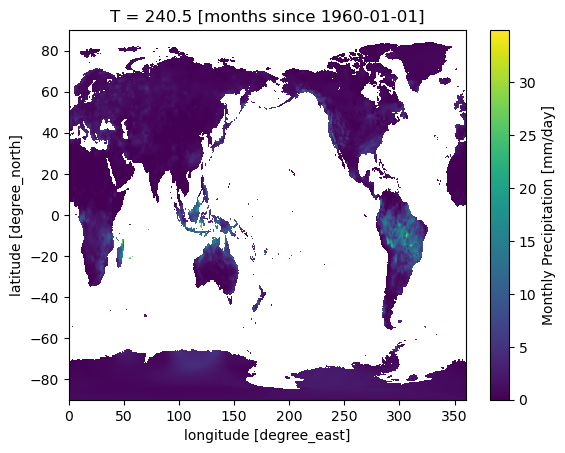

In [9]:
ds['rain'][12,:,:].plot()

# ~~~~~~~~~~~~EXTRA Information~~~~~~~~~~~~~~~~ 

#### Filesystem-Spec (fsspec)

> Filesystem Spec ([fsspec](https://filesystem-spec.readthedocs.io/en/latest/)) is a project to provide a unified pythonic interface to local, remote and embedded file systems and bytes storage.

Fsspec allows us to access many different types of remote files in a simple, uniform way.
Fsspec has many [built in implementations](https://filesystem-spec.readthedocs.io/en/latest/api.html#built-in-implementations) including local files, HTTP, FTP, and Zipfile.
Additional packages implement the fsspec interface to provide access to cloud storage.
These include

- [s3fs](https://s3fs.readthedocs.io/en/latest/) for Amazon S3 and other compatible stores
- [gcsfs](https://gcsfs.readthedocs.io/en/latest/) for Google Cloud Storage
- [adlfs](https://github.com/fsspec/adlfs) for Azure DataLake storage

and [several others](https://filesystem-spec.readthedocs.io/en/latest/api.html#other-known-implementations).

### Local Files

Some programs require data to be on your local hard drive to read.

To download files to your local computer, we strongly recommend [Pooch](https://www.fatiando.org/pooch/latest/).

Here is an example of using Pooch to download data from the [CRESIS Radar Database](https://data.cresis.ku.edu/).
As with the examples above, the first step is to nagivate to web page and try to figure out the actual URL of the files you want to download.

In [10]:
import pooch
POOCH = pooch.create(
    path=pooch.os_cache("2017_Antarctica_P3/CSARP_mvdr"),
    base_url="https://data.cresis.ku.edu/data/rds/2017_Antarctica_P3/CSARP_mvdr/20171124_03/",
    registry={
        "Data_img_02_20171124_03_020.mat": None,
    }
)

local_fname = POOCH.fetch("Data_img_02_20171124_03_020.mat")
local_fname

'/global/home/users/hgamarro/.cache/2017_Antarctica_P3/CSARP_mvdr/Data_img_02_20171124_03_020.mat'

The file is now saved locally and can be read, e.g. with h5py.

In [11]:
import h5py

f = h5py.File(local_fname)
list(f)

['#refs#',
 'Bottom',
 'Data',
 'Elevation',
 'GPS_time',
 'Heading',
 'Latitude',
 'Longitude',
 'Pitch',
 'Roll',
 'Surface',
 'Time',
 'param_combine',
 'param_csarp',
 'param_records']

Here is another example

In [12]:
POOCH = pooch.create(
    path=pooch.os_cache("greenland_ice_sheet"),
    base_url="https://zenodo.org/record/4977910/files/",
    registry={
        "vel_2010-07-01_2011-06-31.nc": "md5:80ad1a3c381af185069bc032a6459745",
    }
)

fname = POOCH.fetch("vel_2010-07-01_2011-06-31.nc")
fname

'/global/home/users/hgamarro/.cache/greenland_ice_sheet/vel_2010-07-01_2011-06-31.nc'

This downloads a netCDF file we can read with Xarray:

In [13]:
ds = xr.open_dataset(fname)
ds

<xarray.Dataset> Size: 1GB
Dimensions:       (x: 10018, y: 17946)
Coordinates:
  * x             (x) float64 80kB -6.38e+05 -6.378e+05 ... 8.644e+05 8.646e+05
  * y             (y) float64 144kB -6.576e+05 -6.578e+05 ... -3.349e+06
Data variables:
    coord_system  |S1 1B ...
    VX            (y, x) float32 719MB ...
    VY            (y, x) float32 719MB ...
Attributes: (12/27)
    Conventions:               CF-1.6
    Metadata_Conventions:      CF-1.6, Unidata Dataset Discovery v1.0, GDS v2.0
    standard_name_vocabulary:  CF Standard Name Table (v22, 12 February 2013)
    id:                        vel_final.t.nc
    title:                     MEaSURES Antarctica Ice Velocity Map 450m spacing
    product_version:            
    ...                        ...
    time_coverage_start:       1995-01-01
    time_coverage_end:         2016-12-31
    project:                   NASA/MEaSUREs_UC-Irvine
    creator_name:              J. Mouginot
    comment:                    
    license:                   No restrictions on access or use

## Best practices for data sharing: FAIR

The acronym FAIR - Findable, Accessible, Interoperable, Reusable - has recently caught on as the gold standard for data sharing.
The [FAIR principles](https://www.force11.org/group/fairgroup/fairprinciples) are [growing rapidly](https://eos.org/editors-vox/enabling-findable-accessible-interoperable-and-reusable-data) in the geoscience community.

Here we repeat and discuss the FAIR principles (via https://www.force11.org/group/fairgroup/fairprinciples)

### To be Findable:

F1. (meta)data are assigned a globally unique and eternally persistent identifier.

F2. data are described with rich metadata.

F3. (meta)data are registered or indexed in a searchable resource.

F4. metadata specify the data identifier.

### To be Accessible:

A1  (meta)data are retrievable by their identifier using a standardized communications protocol.

A1.1 the protocol is open, free, and universally implementable.

A1.2 the protocol allows for an authentication and authorization procedure, where necessary.

A2 metadata are accessible, even when the data are no longer available.

### To be Interoperable:
    
I1. (meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation.

I2. (meta)data use vocabularies that follow FAIR principles.

I3. (meta)data include qualified references to other (meta)data.


### To be Re-useable:
    
R1. meta(data) have a plurality of accurate and relevant attributes.

R1.1. (meta)data are released with a clear and accessible data usage license.

R1.2. (meta)data are associated with their provenance.

R1.3. (meta)data meet domain-relevant community standards.

### Persistent Identifiers (PI / PID)

Persistent identifier are quasi-permanent unique identifiers that can be used to look up data, articles, books, etc.
They are a key aspect of making data _Findable_.
Digitial persistent identifiers are usually HTTP URLs that are guaranteed to continue working for a long time (in contrast to general URLs, which could change or disappear at any time.)

#### Digital Object Identifiers

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/DOI_logo.svg/1200px-DOI_logo.svg.png" width="20%" />

In science, the [DOI system](https://www.doi.org/) has become a univerally accepted way to identify and find digital scholarly objects.
A DOI consists of a string of characters. Prepending the URL `https://doi.org/` to a DOI will generate a web link that can be used to look up the object.

Publishers (of journal articles, books, data repositories, etc.) will typical generate (or "mint") a DOI for new content when it is published.
The publisher commits to making the DOI work "forever". 
That's why not just anyone can create a DOI; it's a commitment.

Here are some examples of DOIs. Click the links to see where they go.

| Product Type | DOI | DOI Resolver |
| -- | -- | -- |
| Article | `10.1109/MCSE.2021.3059437` | https://doi.org/10.1109/MCSE.2021.3059437 |
| Dataset | `10.6084/m9.figshare.3507758.v1` | https://doi.org/10.6084/m9.figshare.3507758.v1 |
| Software | `10.5281/zenodo.4821276` | https://doi.org/10.5281/zenodo.4821276 |

### How can YOU can create FAIR data and code?

### What not to do

- Put the data / code on your personal website
- Put the data / code in Google Drive / Dropbox / etc.
- Put the data / code in GitHub

The problem with these solutions is that they are _not persistent_ and therefore not _findable_.


### Rough guide to FAIRly sharing data

This guide applies to _small_ data (< 10 GB). 
Sharing medium or large datasets is more difficult and complicated--clear solutions and best practices do not yet exist.


#### Step 1: Quality control the data and metadata

Before sharing a dataset, you should apply quality control to ensure there are not bad or incorrect values.
Choose a standard data format appropriate to the structure of your data, as reviewed above.
You also need to generate metadata for your data.
If your format supports embedded metadata (e.g. NetCDF, Zarr), you should provide it following one or more of the metadata conventions reviewed above (e.g. CF, ACDD, etc.)
If not (e.g. csv files), you should provide a separate metadata file (e.g. `README.txt`) to accompany your data.
Once your data and metadata quality control is complete, export the data file[s] to a local folder.


#### Step 2: Upload the data to Zenodo

![Zenodo](https://about.zenodo.org/static/img/logos/zenodo-gradient-200.png)

Our recommended data repository is [Zenodo](https://zenodo.org/).

> Built and developed by researchers, to ensure that everyone can join in Open Science.
>
> The OpenAIRE project, in the vanguard of the open access and open data movements in Europe was commissioned by the EC to support their nascent Open Data policy by providing a catch-all repository for EC funded research. CERN, an OpenAIRE partner and pioneer in open source, open access and open data, provided this capability and Zenodo was launched in May 2013.
>
> In support of its research programme CERN has developed tools for Big Data management and extended Digital Library capabilities for Open Data. Through Zenodo these Big Science tools could be effectively shared with the long­-tail of research.

Via https://about.zenodo.org/

First create a Zenodo account: https://zenodo.org/signup/
Make sure to link your Zenodo account to your GitHub and [ORCID](https://orcid.org/) accounts.

Then go to https://zenodo.org/deposit to deposit a new record.
Follow the instructions provided, and make sure to include as much metadata as you can.
Make sure to choose an open-access license such as Creative Commons.
This will make your data more Interoperable and Re-useable.

When all your data are uploaded and you have double-checked the metadata, you can click "Publish".
This will create a permanent archive for your data and generate a new DOI! 🎉

#### Step 3: Verify you can access the data

Use the [Pooch DOI downloader](https://www.fatiando.org/pooch/latest/api/generated/pooch.DOIDownloader.html) to download and open your data files from a Jupyter Notebook.

Here is an example:

In [16]:
doi = "doi:10.5281/zenodo.5739406"
fname = "wind_po_hrly.csv"
file_path = pooch.retrieve(
    url=f"{doi}/{fname}",
    known_hash="md5:cf059b73d6831282c5580776ac07309a",
)
file_path

'/global/home/users/hgamarro/.cache/pooch/fc13d29563dcf659960ec752e43618fa-wind_po_hrly.csv'

In [17]:
pd.read_csv(file_path).head()

,date.time,ny_1_onshore,ny_2_onshore,newe_onshore,mw_onshore,newe_offshore,ny_offshore,rfce_offshore,srvc_offshore
0,1/1/2011 0:00,0.725240,0.450004,0.693996,0.646463,0.759451,0.528019,0.353946,0.189323
1,1/1/2011 1:00,0.702001,0.446462,0.677913,0.688890,0.767231,0.530822,0.357297,0.212965
2,1/1/2011 2:00,0.670164,0.432219,0.645567,0.717634,0.764237,0.538845,0.374450,0.232722
3,1/1/2011 3:00,0.627149,0.436257,0.608017,0.745687,0.760258,0.541974,0.387670,0.246672
4,1/1/2011 4:00,0.580882,0.456108,0.584728,0.767698,0.759814,0.552363,0.393835,0.261140


### Sharing Code

Putting code on GitHub is very convenient for collaboration.
But GitHub does not meet the FAIR requirements.
Therefore, to make your code truly FAIR, you need to deposit it in a permamenent repository.
Again we recommend Zenodo.
Fortunately, Zenodo and GitHub integrate very well with each other.

The steps for archiving a GitHub repo in Zenodo are [very well documented](https://docs.github.com/en/repositories/archiving-a-github-repository/referencing-and-citing-content).

```{note}
Prior to archiving your repo, you need to [create a CITATION.cff file](https://docs.github.com/en/repositories/managing-your-repositorys-settings-and-features/customizing-your-repository/about-citation-files).
```